Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

Для начала они просят вас — аналитика — подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

Описание данных

Файл moscow_places.csv:
- name — название заведения;
- address — адрес заведения;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- lat — широта географической точки, в которой находится заведение;
- lng — долгота географической точки, в которой находится заведение;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

«Средний счёт: 1000–1500 ₽»;

«Цена чашки капучино: 130–220 ₽»;

«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»
   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- district — административный район, в котором находится заведение, например Центральный административный округ;
- seats — количество посадочных мест.

Ссылка на презентацию: https://drive.google.com/file/d/1zmjwJGHm8Rbo5sntg5HM1RaTM0yUv3sl/view?usp=sharing

### 1. Откроем данные и выполним предобработку

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv(r"C:\Users\rpash\Desktop\шпаргалки\moscow_places.csv")
except:
    df = pd.read_csv('/datasets/moscow_places.csv')

In [3]:
df

In [4]:
df.info()

In [5]:
#проверим дс на дубликаты
df.duplicated().sum()

In [6]:
# Проверим значения в столбце category
df['category'].value_counts()

Наиболее частый тип заведений это кафе - 2378, ресторан - 2043, кофейня - 1413

In [7]:
# Обзор данных датафрейма, получаем статистику
df.describe(include='all')

Всего в дс 8406 заведений, уникальных из них 5614 ( возможны сети и мелкий точкий без названия).
Интеренсный показатели средний чек среди всех зведений 958, средния стоимость кружки кофе 174, среднее количество посадочных мест 108 ( при этом максимум 1288 мест, не ошибка ли это?)

In [8]:
#а есть ли адреса, на которых расположено несколько ресторанов?
print(df['address'].unique())
df['address'].nunique()

Всего у нас 8406 объектов, из них уникальные 5614. Скорее всего это сетевые заведения и заведения без названий.

In [9]:
# проведем поиск дубликатов
df['name'].duplicated().sum()

In [10]:
# приведем названия к единому регистру
df['name'] = df['name'].str.lower()
df['name'].duplicated().sum()

 Мы избавились от разных регистров, и кол-во зведений со схожим названием. Надо проверить так же на не явные дубликаты.

In [11]:
# Возьмем выборку по основным данным
df[['name','category', 'address']].duplicated().sum()

In [12]:
# всего 1 невяный дубликат, уделаим его
df[['name','category', 'address', 'lat', 'lng']].drop_duplicates()

In [13]:
#вынесем наназвание улиц в отдельный столбец
df['street'] = df['address'].apply(lambda x: x.split(', ')[1])
df['street']

In [14]:
# выводим круглосоуточный заведения
df['hours'] = df['hours'].astype('str')
df['is_24/7'] = df['hours'].apply(lambda x: x.endswith('круглосуточно'))
df

Выводы:

При первом просмотре данных не вявленно явных икажений данных, дубликатов нет, есть много пропусков, но они не помешают нам сделать анализ

### Анализ данных

- Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее.

In [15]:
types = (df.groupby('category')
         .agg({'name':'count'})
         .reset_index().rename(columns={'name':'counts'})
         .sort_values(by='counts'))
total = types.counts.sum()
types['ratio_%'] = round((types['counts'] / total*100), 2)

fig = px.bar(
    types, 
    x='counts', 
    y='category', color_discrete_sequence=px.colors.qualitative.Set2,
    text = types['ratio_%'].astype(str) + '%',
    template='plotly_white',
    orientation = 'h',
    title='Распределение по видам объектов общественного питания'
)
fig.update_xaxes(title='Количество объектов')
fig.update_yaxes(title='Тип объекта')
fig.update_xaxes(tickangle=45)
fig.show() 

types.sort_values(by='counts', ascending=False)

Наиболее распростанные объекты питания это кафе 28%, ресторан 24% и кафейня 16%

- Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее

In [16]:
# расчитаем кол-во посад мест по медиане, что б избавиться от выбросов
seats_q = (df.groupby('category')
         .agg({'seats':'median'})
         .reset_index().rename(columns={'seats':'counts'})
         .sort_values(by='counts'))
total = types.counts.sum()
seats_q['ratio_%'] = round((types['counts'] / total*100), 2)

fig = px.bar(
    types, 
    x='counts', 
    y='category', color_discrete_sequence=px.colors.qualitative.Set2,
    text = seats_q['ratio_%'].astype(str) + '%',
    template='plotly_white',
    orientation = 'h',
    title='Распределение по видам объектов общественного питания'
)
fig.update_xaxes(title='Количество мест')
fig.update_yaxes(title='Тип объекта')
fig.update_xaxes(tickangle=45)
fig.show() 

seats_q.sort_values(by='counts', ascending=False)

Наибольшей количество мест в типах зведений бар (82), ресторан (86), кофейня (80)

- Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?

In [17]:
chain = (df.groupby('chain')
             .agg({'name':'count'})
             .reset_index()
             .rename(columns={'name':'count'})
             .sort_values(by='count', ascending=False))
chain['chain'].replace({0:'не сетевые', 1:'сетевые'}, inplace=True)
total_c = chain['count'].sum()
chain['ratio_%'] = round((chain['count'] / total_c*100), 2)
chain

In [18]:
fig = px.pie(chain, values='count', names='chain', 
             color_discrete_sequence=px.colors.qualitative.Set2, 
             title='Соотношение сетевых и несетевых заведений по количеству')
fig.show()

Большая часть заведений не сетевые почти 62%, итересно было бы взглянуть на их фин. результат.
Хотя в целом вход в такой бизнес не сильно высок, по этому он очень привлекателен для малых предпринимателей.

In [19]:
chain_true = (df[df['chain']== 1]
                   .groupby('category')
                   .agg({'name':'count'})
                   .reset_index()
                   .rename(columns={'name':'count'})
                   .sort_values(by='count', ascending=False))
total = chain_true['count'].sum()
chain_true['ratio_%'] = round((chain_true['count'] / total*100), 2)
chain_true

In [20]:
fig = px.bar(
    chain_true.sort_values(by='count'), x='count', y='category', 
    color_discrete_sequence=px.colors.qualitative.Set2, 
    text = types['ratio_%'].astype(str) + '%',
    template='plotly_white',
    title='Распределение по видам объектов общественного питания'
)
fig.update_xaxes(title='Количество объектов')
fig.update_yaxes(title='Тип объекта')
fig.update_xaxes(tickangle=45)
fig.show() 

по типам заведений, ничего нового, лидеры сохраняются.

In [21]:
chain_share = pd.crosstab(df.category, df.chain)
chain_share.columns = [1, 0]
chain_share['total'] = chain_share[1] + chain_share[0]
chain_share['ratio'] = (chain_share[1] / chain_share['total'])*100
chain_share['ratio'] = round(chain_share['ratio'], 2)
chain_share = chain_share.sort_values(by='ratio', ascending=False)
chain_share = pd.DataFrame(chain_share)
chain_share

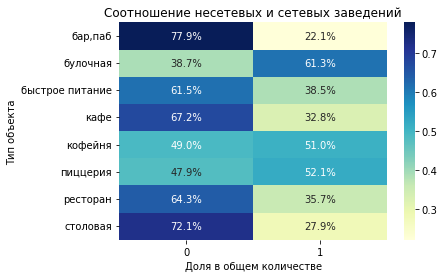

In [22]:
sns.heatmap(pd.crosstab(index=df.category,
                        columns=df.chain,
                        values=df.name,
                        normalize='index',
                        aggfunc='count'),
                        annot=True, fmt='.1%', cmap="YlGnBu")
plt.title('Соотношение несетевых и сетевых заведений')
plt.xlabel('Доля в общем количестве')
plt.ylabel('Тип объекта')
plt.show()
plt.show()

Доля сетевых баров и столовых, значительно выше (78% и 72%), чем не сетевых (22% и 27%) соответсвенно. (уверенн это связанно с операционным затратами по этим направлениям )
Не сетевые булучные ледируют в 61% (в сегменте ценят индивидуальный подход)
Почти паритет в 50% у кофейн и пиццерий

- найдем топ-15 популярных сетей в Москве.

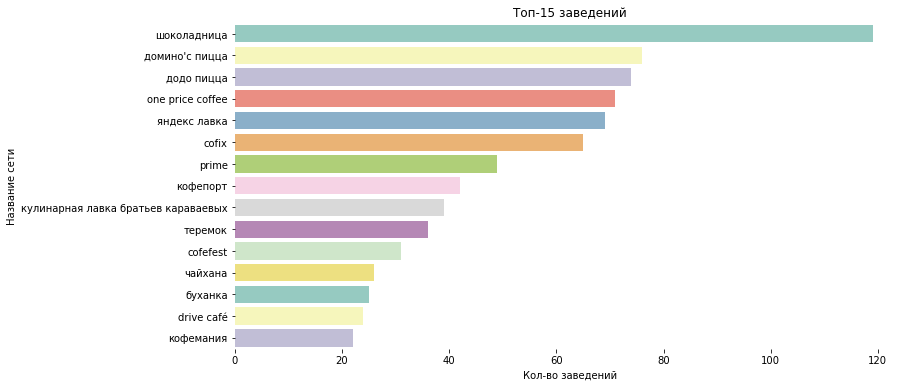

In [23]:
top_chain = (df
    .query('chain == 1')
    .groupby(['name', 'category'])
    .agg({'name': 'count'})
    .rename(columns={'name':'Кол-во заведений'})
)
top_chain = (
    top_chain
    .sort_values(by='Кол-во заведений', ascending=False)
    .reset_index()
    .rename(columns={
        'name': 'Название сети'
    })
        )
display(top_chain.head(15))
# График топ-15 заведений
fig, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes('muted')
sns.barplot(
    x='Кол-во заведений',
    y='Название сети',
    data=top_chain.head(15),
    color='b',
    palette="Set3"
    
)

ax.set(title='Топ-15 заведений')

sns.despine(left=True, bottom=True)

Обсалютный лидер направления это кафейни, и соотвественно сетевые заведения

- Отобразите общее количество заведений и количество заведений каждой категории по районам.

In [24]:
# Какие административные районы Москвы присутствуют в датасете
df['district'].unique()

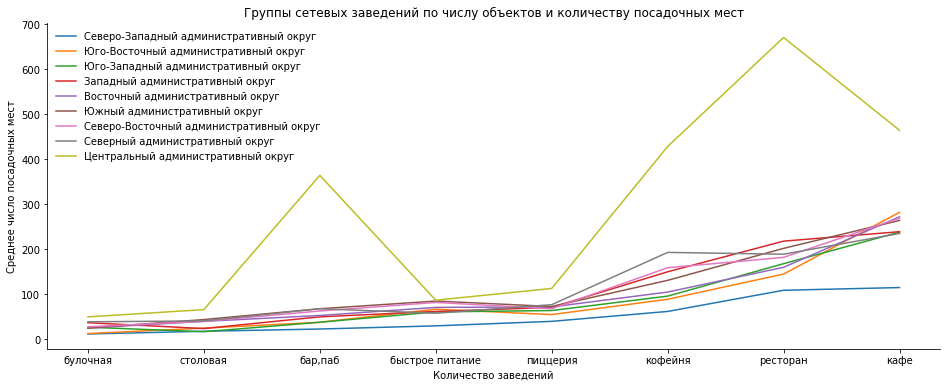

In [25]:
zone = (df.groupby(['district','category'])
         .agg({'name':'count'})
         .reset_index().rename(columns={'name':'counts'})
         .sort_values(by='counts'))


fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(
    data=zone,
    x='category',
    y='counts',
    hue='district'
)

ax.legend(loc='upper left', frameon=False)
ax.set(
    title='Группы сетевых заведений по числу объектов и количеству посадочных мест',
    xlabel='Количество заведений',
    ylabel='Среднее число посадочных мест'
)

sns.despine()

Лидер ЦАО, наличие больших офисов и туристических объектов создает наибольшую привлекательность.

- Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

In [26]:
avg_rating = (df.groupby(['category','rating'])
             .agg({'name':'count'})
             .reset_index()
             .rename(columns={'name':'counts'})
             .sort_values(by='category'))
avg_rating

In [27]:
fig = px.box(avg_rating, x='category', y='rating', 
             title='Соотношение среднего рейтинга рейтинга к типу заведения')
fig.show()

Вот теперь мы можем оценить рейтинги по медианным значениям, более низкий рейтинг выставляют бысрое питание, кафе и ресторан ( от 3 до 3.5)
Наивысший рейтинг у булочная, бар, пиццерия и столовая ( в целом по группам от 3.8< )

- Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson

In [28]:
# подключаем модуль для работы с JSON-форматом
import json

# читаем файл и сохраняем в переменной
try:
    with open('admin_level_geomap.geojson', 'r') as f:
        geo_json = json.load(f)
except:
    with open(r"C:\Users\rpash\Desktop\шпаргалки\admin_level_geomap.geojson") as f:
        geo_json = json.load(f)
#print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True))

In [29]:
rating_df = df.groupby('district', as_index=False)['rating'].agg('median')
rating_df

In [30]:
# импортируем карту и хороплет
from folium import Map, Choropleth

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# загружаем JSON-файл с границами округов Москвы
state_geo = geo_json

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

Вот тут я накосячил, не знаю почему не работает )
Но из табличных данных видим похожую историю, что рейтинги черезчур однородны

- Отобразите все заведения датасета на карте с помощью кластеров

In [31]:
# импортируем карту и маркер
from folium import Map, Marker
# импортируем кластер
from folium.plugins import MarkerCluster

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
df.apply(create_clusters, axis=1)

# выводим карту
m


При нанесение кластеров видно, что нибольшее кол-во заведений находятся в центре и на севере и юго-восток

- Найдите топ-15 улиц по количеству заведений.

In [57]:
top_streets = (df
                 .groupby(['street', 'category'])
                 .agg({'name':'count'})
                 .reset_index()
                 .rename(columns={'name':'counts'})
                 .sort_values(by='counts', ascending=False))
top_streets_1 = top_streets.head(15)
top_streets

In [58]:
top_15 = df.groupby('street').count().sort_values(by='category', ascending=False).head(15).reset_index()
top_15

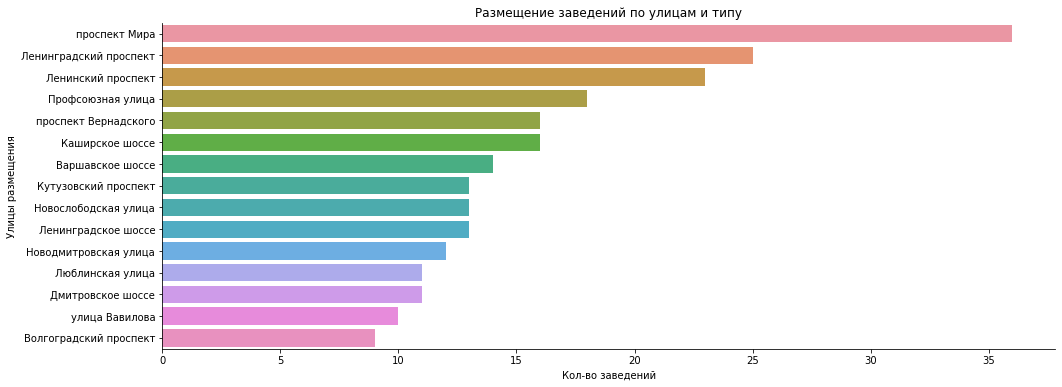

In [61]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.barplot(
    data=top_15,
    x='name',
    y='street'
    #hue='category'
)

#ax.legend(loc='lower right', frameon=False)
ax.set(
    title='Размещение заведений по улицам и типу',
    xlabel='Кол-во заведений',
    ylabel='Улицы размещения'
)

sns.despine()

Лидер "проспект Мира" во всех типах заведений. 
НЕплохие результаты показывает "Профсоюзная улица", "Ленинский проспект" и "Ленинградский проспект"

- Найдите улицы, на которых находится только один объект общепита

In [34]:
street_1 = (df
                 .groupby('street')
                 .agg({'name':'count'})
                 .reset_index()
                 .rename(columns={'name':'counts'})
                 .sort_values(by='counts'))
street_1 = street_1.query('counts == 1')
street_1.count()

In [35]:
street_1

Всего 458 заведения, единолично присутвуют на улице, но возможно за углом у них всегда находится конкурент )

In [36]:
bill_df = df.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
bill_df

In [37]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# загружаем JSON-файл с границами округов Москвы
state_geo = geo_json

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=bill_df,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.6,
    legend_name='Средний ценник заведений по районам',
).add_to(m)

# выводим карту
m

Максимальный средний чек, в Западном и Центральном округе в 1000 р, так же хороший результат в северный и северо-западный округ в 700 и 650 р

In [38]:
coffe_df = df.groupby('district', as_index=False)['middle_coffee_cup'].agg('median')
coffe_df

### Общий вывод:

- Наибольшее количество заведений с типом кафе, ресторан и кафейня суммарно 69% от всех заведений
- Среднее кол-во посадочный мест кафе (60), ресторан (86), кофейня (80)
- Большая часть заведений не сетевые 62%
- При этом сетевый заведения показывают лучшую преставленность по районам и по улицам
- Максимальный средний чек, в Западном и Центральном округе в 1000 р, так же хороший результат в северный и северо-западный округ в 700 и 650 р
- Максимальная средня стоимость кофе Юго-Западный округ 197 р, Центральный 190 р, Западный 187 р.

###  Детализируем исследование: открытие кофейни

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Попробуйте определить, осуществима ли мечта клиентов.

Ответьте на следующие вопросы:
 - Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?
 - Есть ли круглосуточные кофейни?
 - Какие у кофеен рейтинги? Как они распределяются по районам?
 - На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [39]:
df = df.query("category == 'кофейня'")
df.head(10)

In [40]:
central_perc = (df
    .groupby('district')
    .agg({'name': 'count'})
    .rename(columns={'name':'counts'}))
central_perc

Всего кофейн - 1413, наибольшее число в центральном округе - 428

In [41]:
unloc = df[df['is_24/7']== True]
unloc['name'].count()

In [42]:
unloc.head(10)

Как говориться, Москва никогда не спит и целых 60 кафейн работают круглосуточно, дополнительно можно отметить что большество из них сетевые

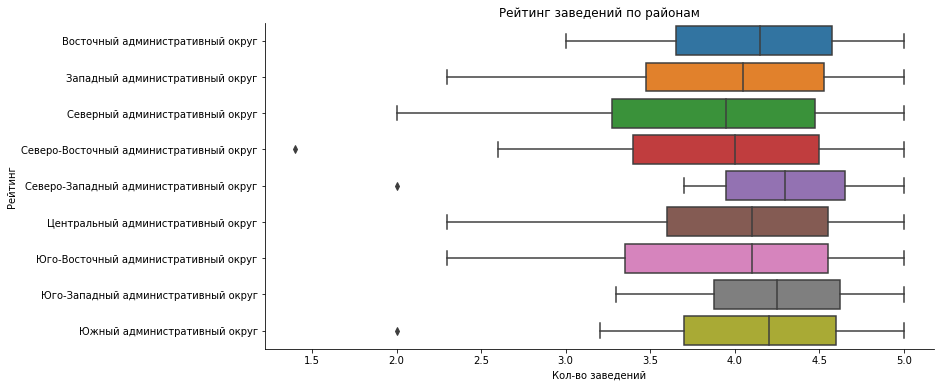

In [43]:
cafe_rating = (df
    .groupby(['district', 'rating'])
    .agg({'name': 'count'})
    .reset_index()
    .rename(columns={'name':'counts'})
    .sort_values(by='district')         
    )


fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=cafe_rating,
    x='rating',
    y='district'
    #hue='district'
)

ax.set(
    title='Рейтинг заведений по районам',
    xlabel='Кол-во заведений',
    ylabel='Рейтинг'
)

sns.despine()

Самые высокие рейтинги в северо-западном округе, так же среди лидеров восточный и юго-западный округ

Наивысшая стоимость чашки кофе в западном, центральном и юго-западном районах

In [51]:
coffe_cup = df.groupby('district', as_index=False)['middle_coffee_cup'].agg('median')
coffe_cup = coffe_cup.sort_values(by='middle_coffee_cup', ascending=False)

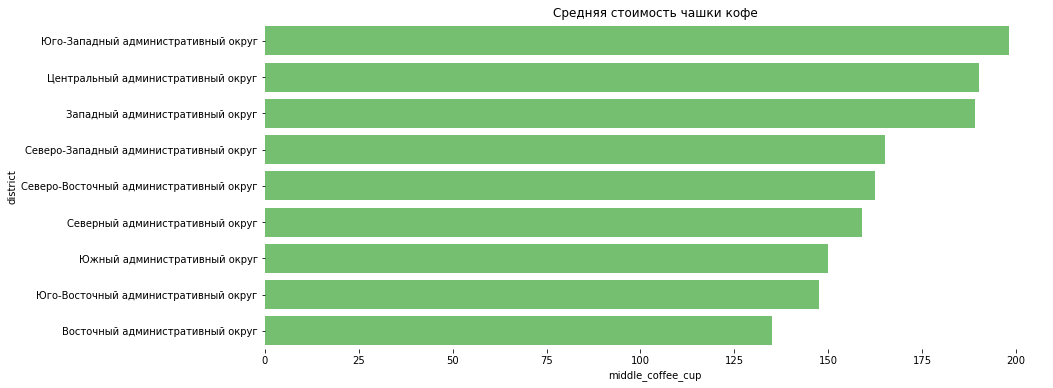

In [54]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.barplot(
    x='middle_coffee_cup',
    y='district',
    data=coffe_cup,
    color='g'
    
)

ax.set(title='Средняя стоимость чашки кофе')

sns.despine(left=True, bottom=True)

### Выводы:

При данных условия постановки задачи, есть следующие рекомендации

 - Для открытия кафе лучше выбирать центральный или северо-западный район
    
    В центальном районе и так собранны набольшее число заведений, следовательно там уже есть готовая коньюктура для потребителей.
    
    Северо-западный район на оборот показывает небольшое кол-во заведений (62) и при этом высокую стоимость чашки (165 руб)
    
    Так же из рекомендаций, нет смсыла открывать крглосуточное завдение, пока не будет развита сеть
    
    Кол-во посадочных мест лучше закладывать около 80

